In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  
import warnings
warnings.filterwarnings('ignore')

In [194]:
initial = pd.read_csv('zameen-data.csv')
data = initial.copy()
data.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-19,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-19,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-19,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-19,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [195]:
data.shape

(168446, 20)

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

In [197]:
data.isnull().sum()[data.isnull().sum()>0]

agency    44071
agent     44072
dtype: int64

<br><br>
### Let us gather initial insights about the different columns of the data.


- #### Make sure we do not have duplicates

In [198]:
data.duplicated().sum()

0

- #### Number of properties from each city

In [199]:
data.city.value_counts()

Karachi       60484
Lahore        41427
Islamabad     37426
Rawalpindi    20976
Faisalabad     8133
Name: city, dtype: int64

Order seems to be somewhat expected. Karachi is the largest city in the list. Lahore is second, however the twin city combined has larger number of properties than Lahore, which also seems about right. Lastly Faisalabad is on last, which is also expected. 

- #### Checking to see if location ID and location corresponds to the same place.

In [200]:
print(data['location_id'].nunique())
print(data['location'].nunique())

4198
1509


So, we seem to have more location IDs than locations themselves. This means we do not have a 1 to 1 relation between location and location_id. Let us confirm this.

In [201]:
locations_data = data.groupby(by=['location', 'location_id']).size().reset_index().rename(columns = {0: 'properties'})
locations_data.head()

,location,location_id,properties
0,12th Avenue,12288,4
1,204 Chak Road,9511,8
2,7th Avenue,3104,48
3,9th Avenue,3105,27
4,AGHOSH,1468,1


In [202]:
locations_data[locations_data.location.duplicated()]

,location,location_id,properties
5,AGHOSH,3107,5
11,AWT Army Welfare Trust,3581,7
12,AWT Army Welfare Trust,8212,1
13,AWT Army Welfare Trust,8213,1
14,AWT Army Welfare Trust,8216,1
...,...,...,...
4189,Zaraj Housing Scheme,3509,8
4190,Zaraj Housing Scheme,3510,1
4191,Zaraj Housing Scheme,3511,16
4192,Zaraj Housing Scheme,3512,5


This table shows how there are multiple location IDs for the same location. 

<br><br>
### Engineering the columns that are of use to us 

- #### Let us drop the columns that are of not much use to us

In [203]:
drop_col = ['page_url', 'agency', 'agent']
data.drop(columns=drop_col, inplace=True)
data.shape

(168446, 17)

In [204]:
data.purpose.value_counts()

For Sale    120655
For Rent     47791
Name: purpose, dtype: int64

In [205]:
data.head()

,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,Area Type,Area Size,Area Category
0,237062,3325,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-19,Marla,4.0,0-5 Marla
1,346905,3236,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-19,Marla,5.6,5-10 Marla
2,386513,764,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,Marla,8.0,5-10 Marla
3,656161,340,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-19,Kanal,2.0,1-5 Kanal
4,841645,3226,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-19,Marla,8.0,5-10 Marla


- #### The date_added column is not only in the wrong format (object, instead of a datetime format), but it is also inconsistent. This is a nightmare, but there is a clever way of solving this.

In [206]:
data.date_added.value_counts()

07-03-19      9485
07-17-2019    8058
07-04-19      6815
06-27-2019    6639
07-02-19      6604
              ... 
09-08-18         6
10-05-18         6
09-05-18         3
08-05-18         3
08-06-18         1
Name: date_added, Length: 124, dtype: int64

The format seems to be either "mm-dd-yyyy" or "mm-dd-yy". We can do solve this problem in this way:

In [207]:
data["partial_date"] = pd.to_datetime(data.date_added, format = '%m-%d-%y', errors='coerce')

Using this, we converted one of the formats. And the formats that were not able to be converted were replaced with NULLs. Now, we can apply the next format to only the nulls.

In [208]:
data["partial_date"].head()

0   2019-02-04
1   2019-05-04
2          NaT
3   2019-04-05
4   2019-07-10
Name: partial_date, dtype: datetime64[ns]

In [209]:
data.partial_date.update(pd.to_datetime(data[data["partial_date"].isnull()].date_added, format="%m-%d-%Y"))

In [210]:
data.partial_date.isnull().sum()

0

No more nulls remaining. Both the date formats were corrected. Now, we will drop the original date_added column and replace it with the new one.

In [211]:
data.drop(columns=['date_added'], inplace=True)
data.rename(columns={"partial_date": "date_added"}, inplace=True)
data.head()

,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,Area Type,Area Size,Area Category,date_added
0,237062,3325,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,Marla,4.0,0-5 Marla,2019-02-04
1,346905,3236,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,Marla,5.6,5-10 Marla,2019-05-04
2,386513,764,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,Marla,8.0,5-10 Marla,2019-07-17
3,656161,340,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,Kanal,2.0,1-5 Kanal,2019-04-05
4,841645,3226,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,Marla,8.0,5-10 Marla,2019-07-10


In [212]:
data.date_added.sort_values(ascending=False)

168445   2019-07-18
163524   2019-07-18
163541   2019-07-18
163539   2019-07-18
163534   2019-07-18
            ...    
11545    2018-08-07
11862    2018-08-06
12808    2018-08-05
12135    2018-08-05
12833    2018-08-05
Name: date_added, Length: 168446, dtype: datetime64[ns]

So, our data is between 5 Aug 2018 and 18 July 2019.

- #### The Area Size and Area Type should be converted into a common format, for it to make sense. So, we will convert those to Square Yard.

In [213]:
# Checking if we have any values besides Marla and Kanal
data["Area Type"].nunique()

2

In [214]:
def area_correction(type, value):
    if type == 'Marla':
        area = value*30.25
    else:
        area = value*605
    return area

data["Area Sqr Yard"] = data.apply(lambda x: area_correction(x["Area Type"], x["Area Size"]), axis=1)

Now, we will also drop the following columns, since it is just redundant information.

In [215]:
data.drop(columns=['Area Type', 'Area Size', 'area'], inplace=True)
data.drop("Area Category", axis=1, inplace=True)
data.head()

,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,Area Sqr Yard
0,237062,3325,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2019-02-04,121.0
1,346905,3236,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,2019-05-04,169.4
2,386513,764,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,2019-07-17,242.0
3,656161,340,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,2019-04-05,1210.0
4,841645,3226,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,2019-07-10,242.0


Also, province_name does not seem to be useful either. We will save it in a seperate dataframe though, so IF we need it, we can use `df.merge` to join it with our main dataframe.

In [216]:
provinces = data.groupby(by=['city', 'province_name']).size().reset_index()
provinces.drop(columns=0, inplace=True)
provinces.head()

,city,province_name
0,Faisalabad,Punjab
1,Islamabad,Islamabad Capital
2,Karachi,Sindh
3,Lahore,Punjab
4,Rawalpindi,Punjab


In [217]:
data.drop(columns='province_name', inplace=True)
data.head()

,property_id,location_id,property_type,price,location,city,latitude,longitude,baths,purpose,bedrooms,date_added,Area Sqr Yard
0,237062,3325,Flat,10000000,G-10,Islamabad,33.679890,73.012640,2,For Sale,2,2019-02-04,121.0
1,346905,3236,Flat,6900000,E-11,Islamabad,33.700993,72.971492,3,For Sale,3,2019-05-04,169.4
2,386513,764,House,16500000,G-15,Islamabad,33.631486,72.926559,6,For Sale,5,2019-07-17,242.0
3,656161,340,House,43500000,Bani Gala,Islamabad,33.707573,73.151199,4,For Sale,4,2019-04-05,1210.0
4,841645,3226,House,7000000,DHA Defence,Islamabad,33.492591,73.301339,3,For Sale,3,2019-07-10,242.0


<br><br>
### Creating tables which we will use to visualize.

- #### This dataframe gives us the individual price and location of every single house. Although this is useful, one other dataset that might be more useful would be to create a new table, which would only include one instance of each location ID. 

In [218]:
data['UnitPrice'] = data['price'] / data["Area Sqr Yard"] 
data.head()

,property_id,location_id,property_type,price,location,city,latitude,longitude,baths,purpose,bedrooms,date_added,Area Sqr Yard,UnitPrice
0,237062,3325,Flat,10000000,G-10,Islamabad,33.679890,73.012640,2,For Sale,2,2019-02-04,121.0,82644.628099
1,346905,3236,Flat,6900000,E-11,Islamabad,33.700993,72.971492,3,For Sale,3,2019-05-04,169.4,40731.995277
2,386513,764,House,16500000,G-15,Islamabad,33.631486,72.926559,6,For Sale,5,2019-07-17,242.0,68181.818182
3,656161,340,House,43500000,Bani Gala,Islamabad,33.707573,73.151199,4,For Sale,4,2019-04-05,1210.0,35950.413223
4,841645,3226,House,7000000,DHA Defence,Islamabad,33.492591,73.301339,3,For Sale,3,2019-07-10,242.0,28925.619835


In [219]:
data["Area Sqr Yard"].describe()

count    168446.000000
mean        361.336650
std        2734.002481
min           0.000000
25%         145.200000
50%         214.775000
75%         363.000000
max      484000.000000
Name: Area Sqr Yard, dtype: float64

There are some HUGE anomalies, and are very limited. Let us detect these.

<AxesSubplot:ylabel='Area Sqr Yard'>

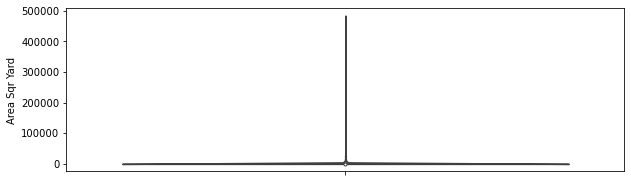

In [220]:
fig, ax = plt.subplots(figsize=(10,3))
sns.violinplot(y=data["Area Sqr Yard"], scale='count')

We cannot even detect them on the violinplot or boxplot. So, they are very few in number. Let us find the 99.99% quantile of the data, and drop the data above it.

In [221]:
area_sqr_yard = data["Area Sqr Yard"].to_numpy()
threshold = np.quantile(area_sqr_yard, 0.9999)
threshold

60500.0

In [222]:
data.drop(index = data[data["Area Sqr Yard"]>threshold].index, inplace=True)

In [223]:
data["Area Sqr Yard"].describe()

count    168430.000000
mean        338.464454
std         774.413911
min           0.000000
25%         145.200000
50%         214.775000
75%         363.000000
max       60500.000000
Name: Area Sqr Yard, dtype: float64

There are also a few values with Area of 0. For this, we will also drop these up till Area  = 10 Sq. Yard (0.33 Marla). Values below this are bad for generalizing or just anomalies.

In [224]:
data.drop(index = data[data["Area Sqr Yard"]<10].index, inplace=True)
data.shape

(168407, 14)

<AxesSubplot:>

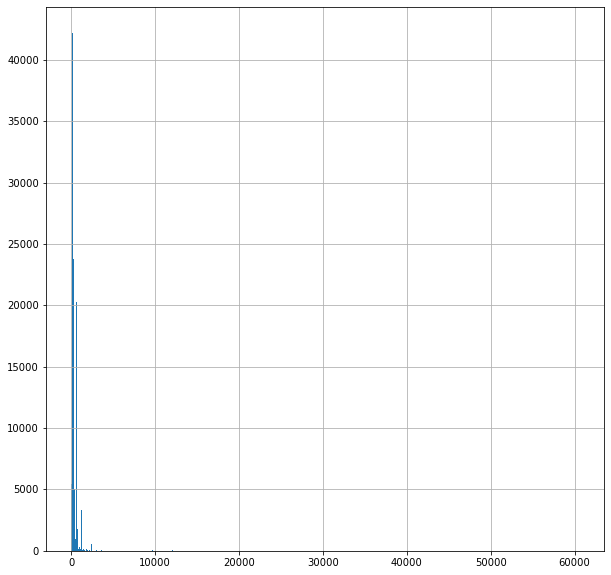

In [225]:
data["Area Sqr Yard"].hist(figsize=(10,10), bins=1000)

The reason why I will not trim this more is because there are a few farmhouses that are huge in size, hence these are not anomalies.

<AxesSubplot:xlabel='latitude'>

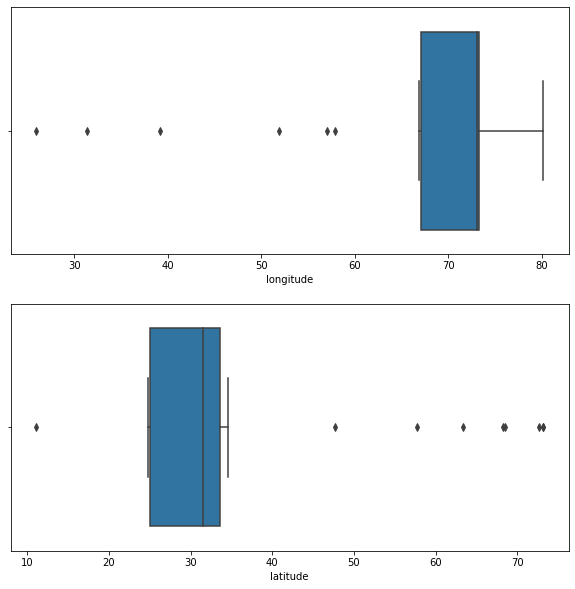

In [226]:
fig, ax = plt.subplots(2,1,figsize=(10,10))
sns.boxplot(data['longitude'], ax=ax[0])
sns.boxplot(data['latitude'], ax=ax[1])

Let us remove these anomalies as well.

In [227]:
anomaly_index = data[(data["longitude"] < 60) | (data["latitude"]>40) | (data["latitude"]<20)].index
data.drop(index=anomaly_index, inplace=True)
data.shape

(168397, 14)

In [228]:
data.head()

,property_id,location_id,property_type,price,location,city,latitude,longitude,baths,purpose,bedrooms,date_added,Area Sqr Yard,UnitPrice
0,237062,3325,Flat,10000000,G-10,Islamabad,33.679890,73.012640,2,For Sale,2,2019-02-04,121.0,82644.628099
1,346905,3236,Flat,6900000,E-11,Islamabad,33.700993,72.971492,3,For Sale,3,2019-05-04,169.4,40731.995277
2,386513,764,House,16500000,G-15,Islamabad,33.631486,72.926559,6,For Sale,5,2019-07-17,242.0,68181.818182
3,656161,340,House,43500000,Bani Gala,Islamabad,33.707573,73.151199,4,For Sale,4,2019-04-05,1210.0,35950.413223
4,841645,3226,House,7000000,DHA Defence,Islamabad,33.492591,73.301339,3,For Sale,3,2019-07-10,242.0,28925.619835


Another test to check is whether the same location_id is used by more than one location. This is going to cause us problems. Hence, we will drop these from the dataset as well.

In [229]:
temp = data.groupby(by=["location_id", "location"]).size().reset_index()
temp_drop = temp[temp['location_id'].duplicated()].index
data.drop(index=temp_drop, inplace=True)

In [241]:
price_density = data.groupby(['location_id','location', 'city', 'purpose', 'property_type']).mean().reset_index()
price_density.head()


,location_id,location,city,purpose,property_type,property_id,price,latitude,longitude,baths,bedrooms,Area Sqr Yard,UnitPrice
0,1,"Lahore, Punjab",Lahore,For Sale,House,1.596438e+07,1.525000e+07,31.545771,74.341328,3.500000,3.500000,226.875000,68595.041322
1,2,"Karachi, Sindh",Karachi,For Sale,House,1.566985e+07,1.200000e+07,24.862336,67.013893,4.000000,4.000000,145.200000,82644.628099
2,3,"Islamabad, Islamabad Capital",Islamabad,For Sale,Flat,1.550807e+07,4.300000e+06,33.749464,73.061142,1.000000,1.000000,51.425000,83616.917842
3,4,Garden Town,Lahore,For Sale,Flat,1.174109e+07,4.200000e+06,31.503922,74.323139,1.000000,1.000000,60.500000,69421.487603
4,4,Garden Town,Lahore,For Sale,House,1.572257e+07,5.680337e+07,31.503922,74.323139,3.123596,4.393258,694.730337,95561.241276


Dropping the meaningless (or useless) columns

In [242]:
col = ['property_id', 'baths', 'bedrooms']
price_density.drop(columns=col, inplace=True)

In [243]:
price_density.head()

,location_id,location,city,purpose,property_type,price,latitude,longitude,Area Sqr Yard,UnitPrice
0,1,"Lahore, Punjab",Lahore,For Sale,House,1.525000e+07,31.545771,74.341328,226.875000,68595.041322
1,2,"Karachi, Sindh",Karachi,For Sale,House,1.200000e+07,24.862336,67.013893,145.200000,82644.628099
2,3,"Islamabad, Islamabad Capital",Islamabad,For Sale,Flat,4.300000e+06,33.749464,73.061142,51.425000,83616.917842
3,4,Garden Town,Lahore,For Sale,Flat,4.200000e+06,31.503922,74.323139,60.500000,69421.487603
4,4,Garden Town,Lahore,For Sale,House,5.680337e+07,31.503922,74.323139,694.730337,95561.241276


In [244]:
price_density.shape

(9427, 10)

In [248]:
price_density.to_csv("price_density.csv")

In [249]:
price_density2 = data.groupby(['location', 'city', 'purpose', 'property_type']).mean().reset_index()
col = ['property_id', 'baths', 'bedrooms']
price_density2.drop(columns=col, inplace=True)

In [250]:
price_density2.head()

,location,city,purpose,property_type,location_id,price,latitude,longitude,Area Sqr Yard,UnitPrice
0,12th Avenue,Islamabad,For Rent,Penthouse,12288.0,4.000000e+04,33.624151,72.996002,302.500000,132.231405
1,12th Avenue,Islamabad,For Rent,Upper Portion,12288.0,4.000000e+04,33.624151,72.996002,423.500000,94.451004
2,12th Avenue,Islamabad,For Sale,Flat,12288.0,3.000000e+07,33.624151,72.996002,281.325000,106638.229805
3,204 Chak Road,Faisalabad,For Rent,House,9511.0,3.500000e+04,31.404153,73.136959,151.250000,231.404959
4,204 Chak Road,Faisalabad,For Sale,House,9511.0,1.162857e+07,31.406337,73.136860,204.403571,56240.250011


In [251]:
price_density2.to_csv("price_density2.csv")